In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy import *

# Define image size and batch size
IMG_SIZE1 = 70
IMG_SIZE2 = 110
BATCH_SIZE = 40

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'signnum/train',
    target_size=(IMG_SIZE1, IMG_SIZE2),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'signnum/train',
    target_size=(IMG_SIZE1, IMG_SIZE2),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'signnum/test',
    target_size=(IMG_SIZE1, IMG_SIZE2),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 13200 images belonging to 11 classes.
Found 3300 images belonging to 11 classes.
Found 1311 images belonging to 1 classes.


In [6]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(40, (3, 3), activation='relu', input_shape=(IMG_SIZE1, IMG_SIZE2, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(80, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(160, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(160, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(11, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,validation_data=val_generator,epochs=3)

Epoch 1/3


330/330 [==============================] - 276s 828ms/step - loss: 0.2201 - accuracy: 0.4592 - val_loss: 0.1511 - val_accuracy: 0.6709
Epoch 2/3
330/330 [==============================] - 82s 249ms/step - loss: 0.0804 - accuracy: 0.8470 - val_loss: 0.1069 - val_accuracy: 0.7821
Epoch 3/3
330/330 [==============================] - 73s 222ms/step - loss: 0.0405 - accuracy: 0.9310 - val_loss: 0.1063 - val_accuracy: 0.7879


In [9]:
model.save("Model2.h5","label.txt")


c:\Users\B.VENKATESWARA RAO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 199ms/step
Predicted class: 5


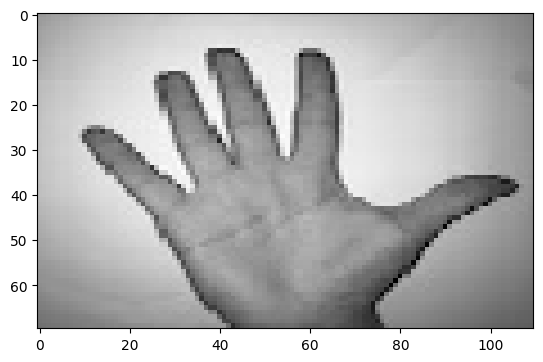

In [10]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your model
model = keras.models.load_model('Model2.h5')

    # Load your image
img_path="signnum\\train\\5\\five_102.jpg"
img = image.load_img(img_path, target_size=(IMG_SIZE1, IMG_SIZE2))
plt.imshow(img)  # Update target_size with your input dimensions
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values

    # Perform prediction
class_labels = {0: "0",1: "1",2: "2",3: "3",4: "4",5: "5",6: "6",7: "7",8: "8",9: "9",10: "unkown"}

    # Perform prediction
predictions = model.predict(img_array)

    # Get the predicted class
predicted_class = np.argmax(predictions)
print("Predicted class:", class_labels[predicted_class])




predicted_class = np.argmax(predictions)
    